# **Breast Cancer Data Analysis**

## **Libraries required**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## **Data Acquisition and Preparation**

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [3]:
# Exploring the dataset keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Create a Pandas DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Getting the target as well
df['target'] = data.target

# Show the first few rows of the DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## **Data Exploration**

In [5]:
# Display basic statistics from data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
# Data types from data
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Checking null values in data
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [8]:
# Check for class imbalance
print("Target variable distribution:")
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True) * 100)

Target variable distribution:
target
1    357
0    212
Name: count, dtype: int64
target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


Since we have about 63% benign and 37% malignant cases, it's not severely imbalanced, but it's still something to address.

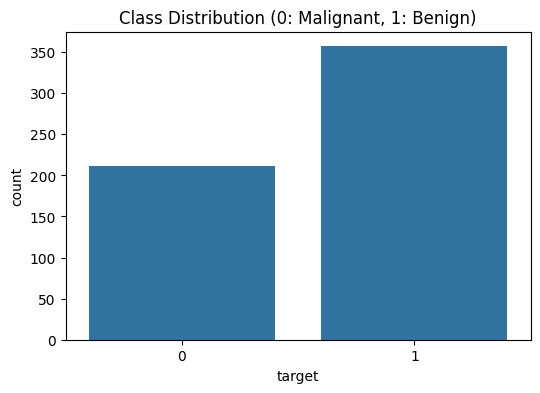

In [9]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0: Malignant, 1: Benign)')
plt.show()

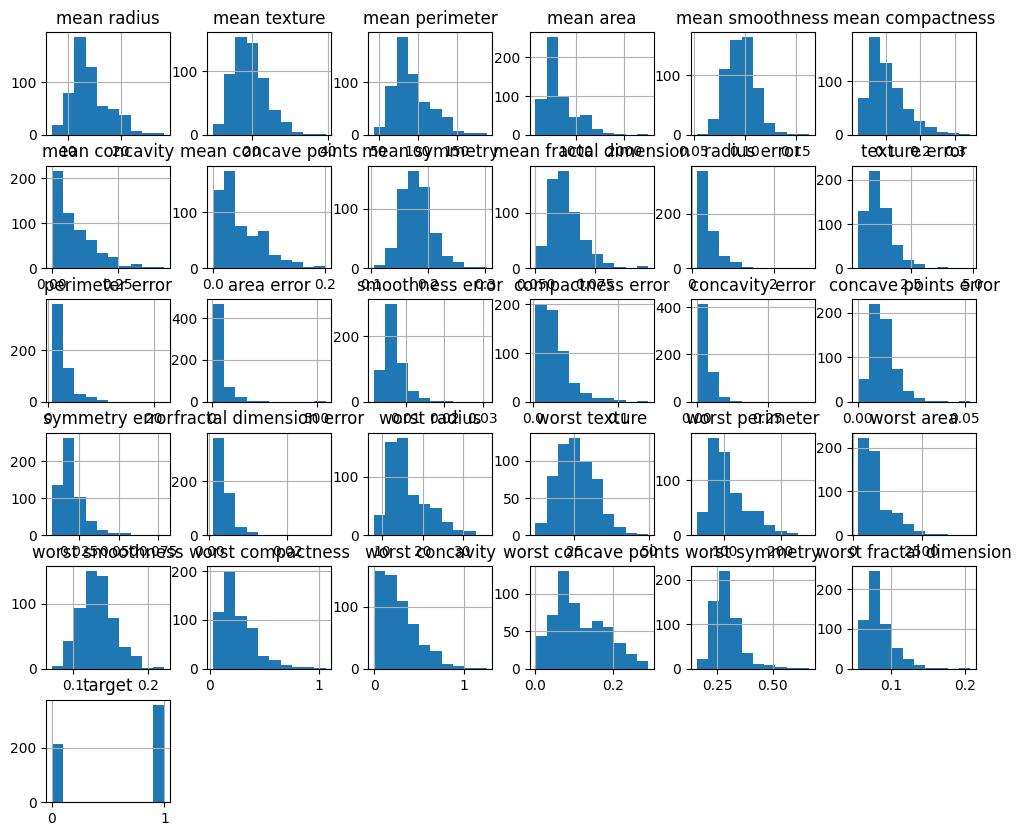

In [10]:
# Visualize feature distributions
df.hist(figsize=(12, 10))
plt.show()

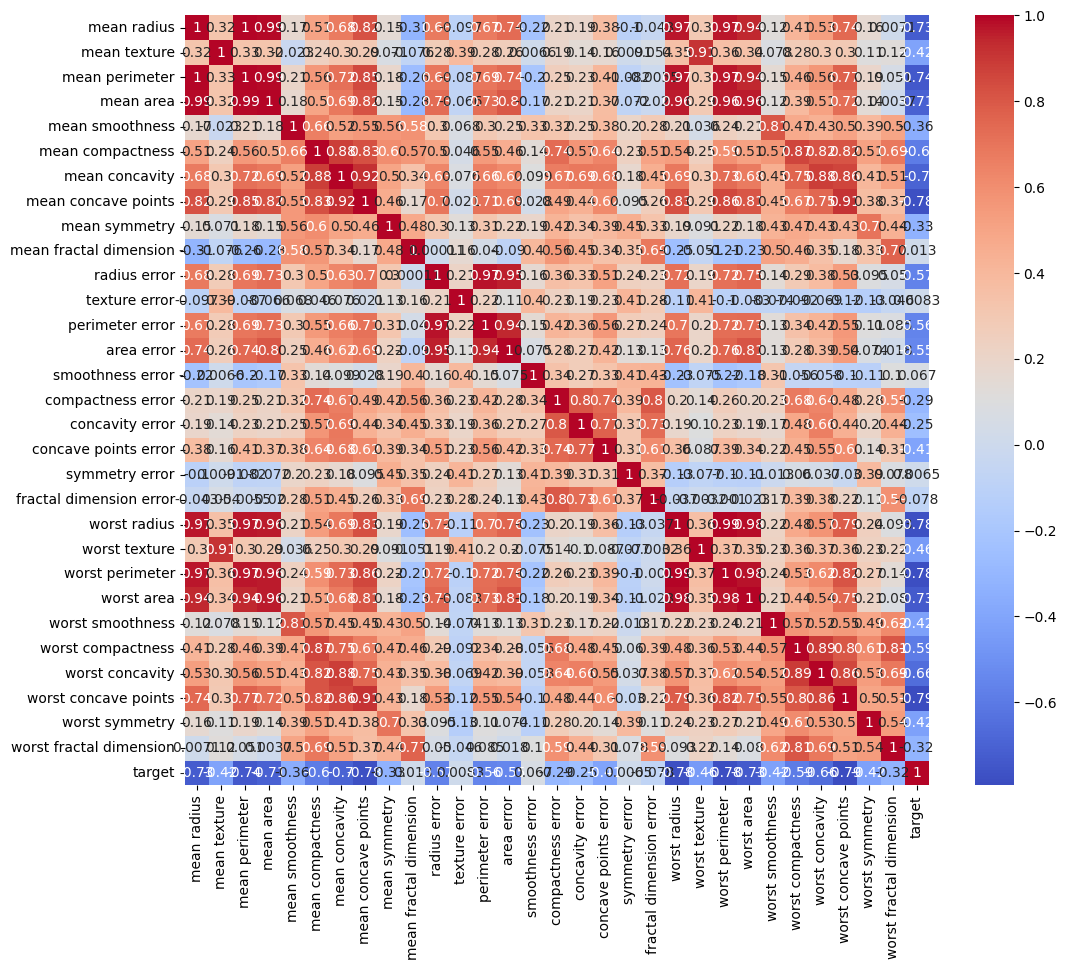

In [11]:
# Explore correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## **Feature Selection**

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Create a SelectKBest object with ANOVA F-value as the score function
selector = SelectKBest(f_classif, k=10)  # Select the top 10 features

# Apply feature selection to get the transformed data
X_new = selector.fit_transform(X, y)

In [13]:
# Split the selected data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

## **Feature Scaling**

In [14]:
# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Grid Search CV for Model Tuning**

In [15]:
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],

}

# Create an MLPClassifier with class weights
mlp = MLPClassifier(random_state=42, max_iter=500, early_stopping=True)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)


Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Best accuracy score found:  0.9362637362637363


In [16]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test accuracy with best model: ", accuracy)

Test accuracy with best model:  0.956140350877193


## **Build and Train the ANN model**

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Calculate class weights based on unique labels in y_train
# Convert y_train to numpy array to ensure consistent data type
y_train_np = y_train.to_numpy()
unique_labels = np.unique(y_train_np)
class_weights = {label: (1 / np.sum(y_train_np == label)) * (len(y_train_np) / len(unique_labels)) for label in unique_labels}

# Define the ANN model (example)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

# Compile the model with weighted binary cross-entropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', AUC(name='auc')])

# Train the model with class weights
log = model.fit(X_train, y_train_np, epochs=100, batch_size=32, class_weight=class_weights, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2895 - auc: 0.1083 - loss: 0.9257 - val_accuracy: 0.7692 - val_auc: 0.6311 - val_loss: 0.6738
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8078 - auc: 0.6815 - loss: 0.6622 - val_accuracy: 0.8462 - val_auc: 0.8958 - val_loss: 0.5531
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8666 - auc: 0.8830 - loss: 0.5366 - val_accuracy: 0.8901 - val_auc: 0.9668 - val_loss: 0.4649
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8965 - auc: 0.9623 - loss: 0.4313 - val_accuracy: 0.9231 - val_auc: 0.9762 - val_loss: 0.3859
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9174 - auc: 0.9753 - loss: 0.3533 - val_accuracy: 0.9231 - val_auc: 0.9768 - val_loss: 0.3188
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9211 - auc: 0.9783 - loss: 0.2957 - val_accuracy: 0.9451 - val_auc: 0.9783 - val_loss: 0.2637
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accu

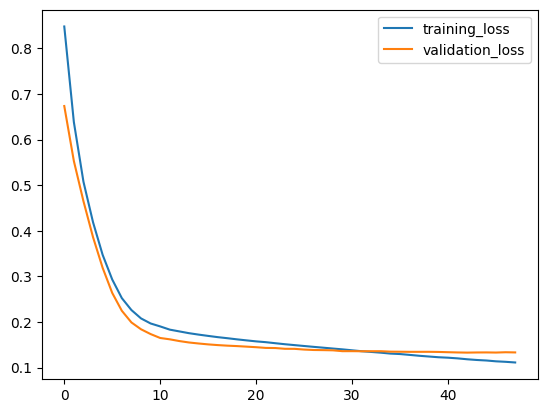

In [28]:
plt.plot(log.history['loss'], label='training_loss')
plt.plot(log.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

In [29]:
# Final Training Metrics
final_train_loss = log.history['loss'][-1]
final_train_accuracy = log.history['accuracy'][-1]
final_train_auc = log.history['auc'][-1]

# Final Validation Metrics
final_val_loss = log.history['val_loss'][-1]
final_val_accuracy = log.history['val_accuracy'][-1]
final_val_auc = log.history['val_auc'][-1]

# Print the final metrics
print(f"Final Training Loss: {final_train_loss}")
print(f"Final Training Accuracy: {final_train_accuracy}")
print(f"Final Training AUC: {final_train_auc}")
print("--"*20)
print(f"Final Validation Loss: {final_val_loss}")
print(f"Final Validation Accuracy: {final_val_accuracy}")
print(f"Final Validation AUC: {final_val_auc}")

Final Training Loss: 0.11114605516195297
Final Training Accuracy: 0.9642857313156128
Final Training AUC: 0.9900832772254944
----------------------------------------
Final Validation Loss: 0.13320161402225494
Final Validation Accuracy: 0.9340659379959106
Final Validation AUC: 0.9905956387519836


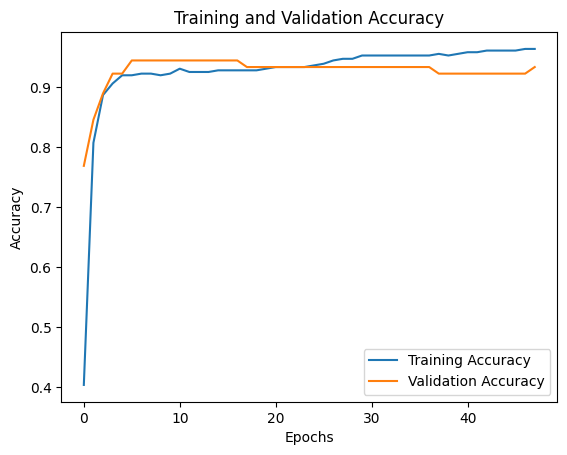

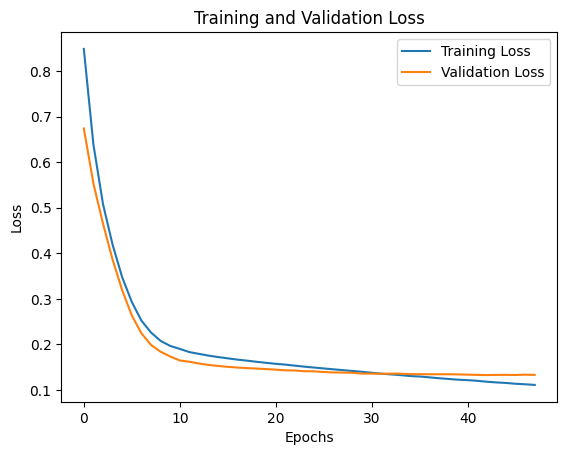

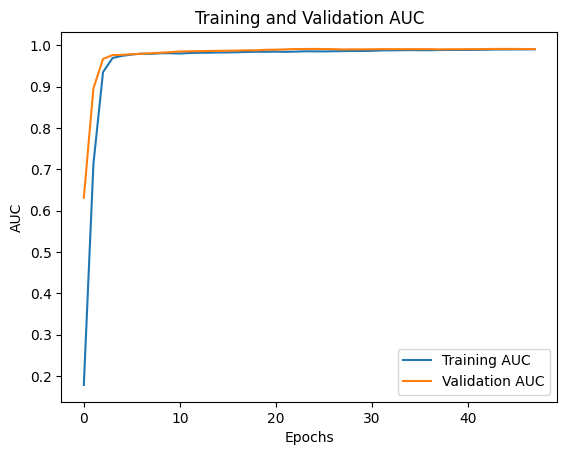

In [30]:
training_accuracy = log.history['accuracy']
validation_accuracy = log.history['val_accuracy']
training_loss = log.history['loss']
validation_loss = log.history['val_loss']
training_auc = log.history['auc']
validation_auc = log.history['val_auc']

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(training_auc, label='Training AUC')
plt.plot(validation_auc, label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training and Validation AUC')
plt.legend()
plt.show()

In [31]:
# Save the entire ANN Model to a single file
model.save('breast_cancer_model.keras')

In [32]:
import pickle

# Save the scaler
with open('breast_cancer_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)